In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch
import torch.nn as nn

In [3]:
df = pd.read_csv('bank_churn_data.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


# Data exploration

In [4]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df['Gender'].nunique()

2

In [7]:
df['Geography'].nunique()

3

In [8]:
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [9]:
df2 = df

In [10]:
map_dict = {'Female' : 0, 'Male' : 1}
df2['Gender'] = df2['Gender'].map(map_dict).astype(int)

In [11]:
df2['Gender'].value_counts()

1    93150
0    71884
Name: Gender, dtype: int64

In [12]:
df2['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [13]:
map_dict = {'France' : 0, 'Spain' : 1, 'Germany' : 2}
df2['Geography'] = df2['Geography'].map(map_dict).astype(int)

In [14]:
#sns.pairplot(df2, hue="Exited")

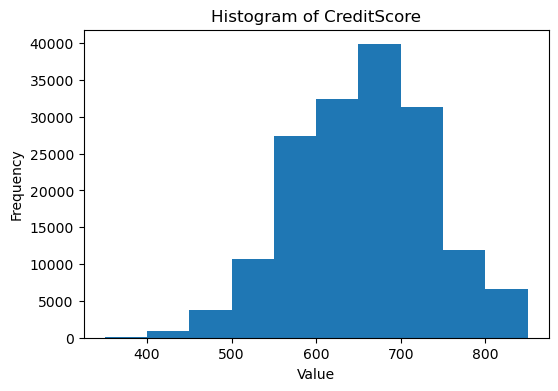

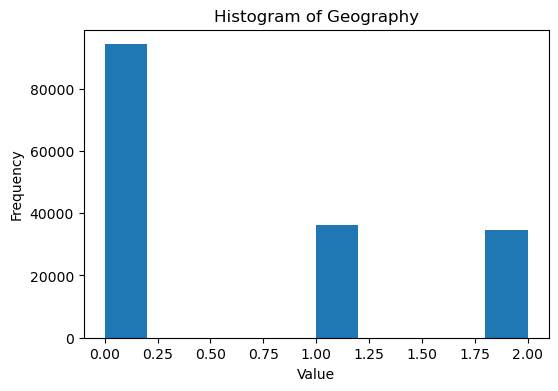

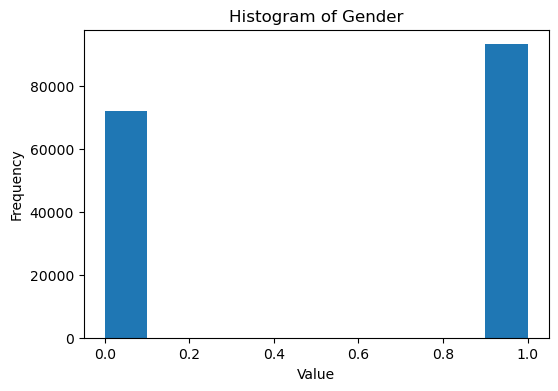

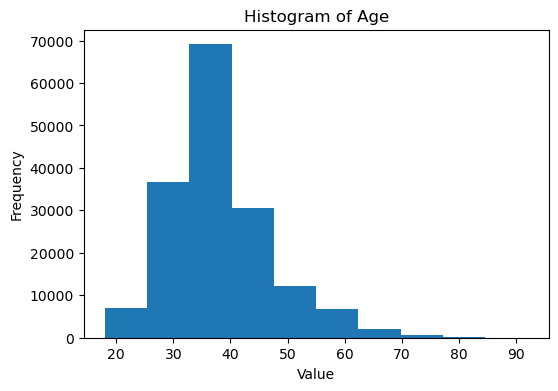

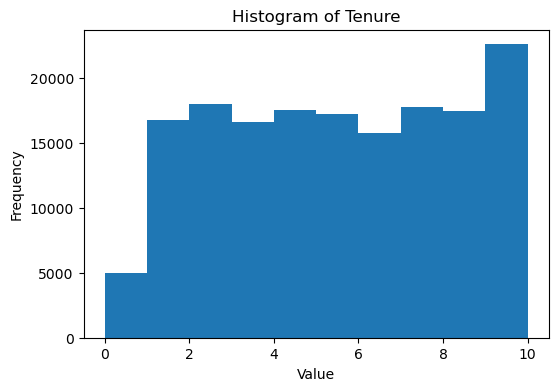

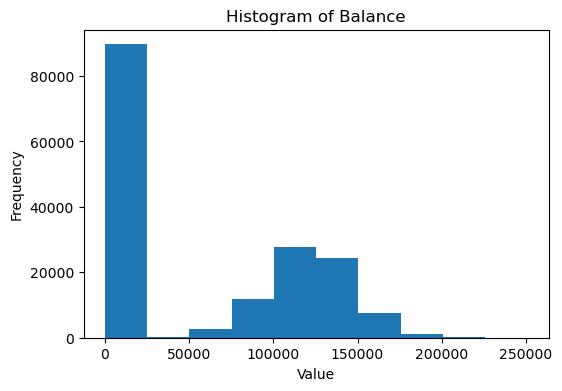

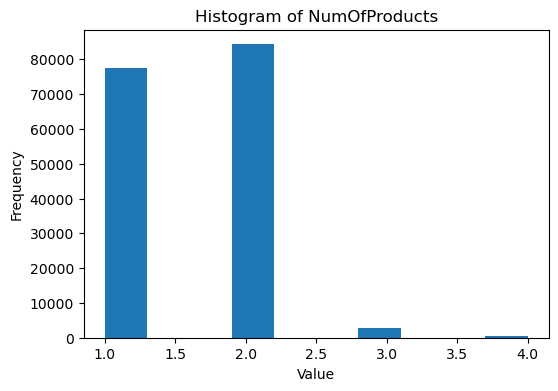

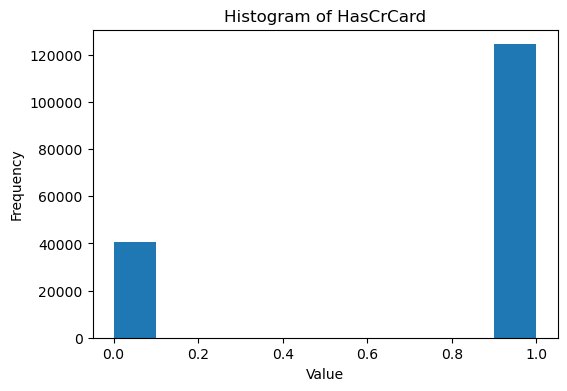

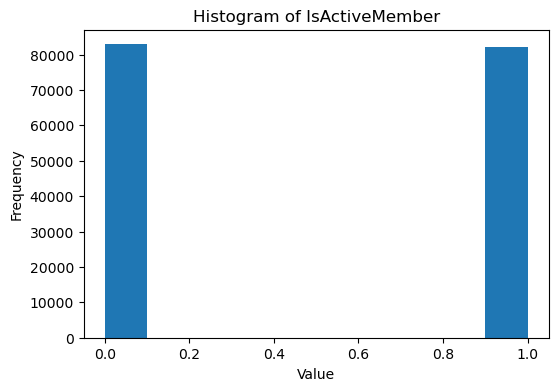

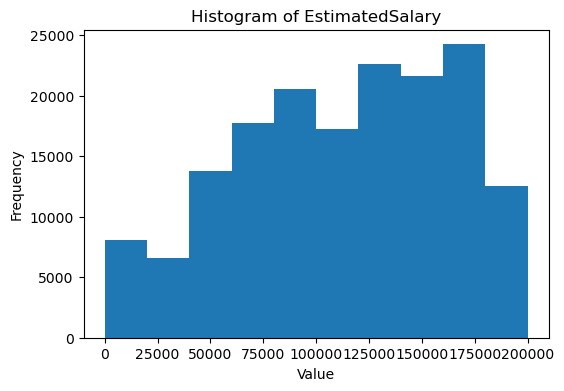

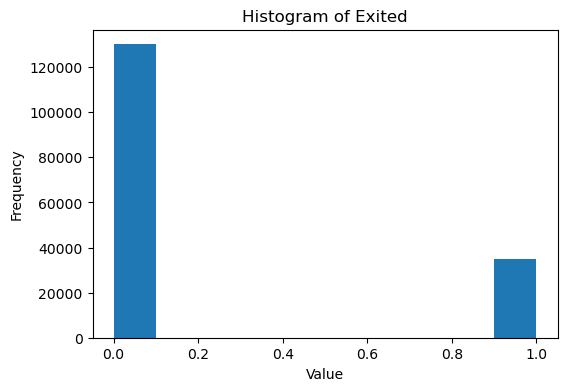

In [15]:
for column in df2.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df2[column], bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [16]:
df2['Balance'].value_counts()

0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: Balance, Length: 30075, dtype: int64

In [17]:
df2['Balance'].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

In [18]:
df2_balance = df2[df2['Balance'] == 0]
df2_balance

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,2,1,0,181449.97,0
1,627,0,1,33.0,1,0.0,2,1,1,49503.50,0
2,678,0,1,40.0,10,0.0,2,1,0,184866.69,0
4,716,1,1,33.0,5,0.0,2,1,1,15068.83,0
8,676,0,1,43.0,4,0.0,2,1,0,142917.13,0
...,...,...,...,...,...,...,...,...,...,...,...
165028,630,0,1,50.0,8,0.0,2,1,1,5962.50,0
165029,667,1,0,33.0,2,0.0,1,1,1,131834.75,0
165030,792,0,1,35.0,3,0.0,1,0,0,131834.45,0
165031,565,0,1,31.0,5,0.0,1,1,1,127429.56,0


<Axes: title={'center': 'CreditScore'}, ylabel='Frequency'>

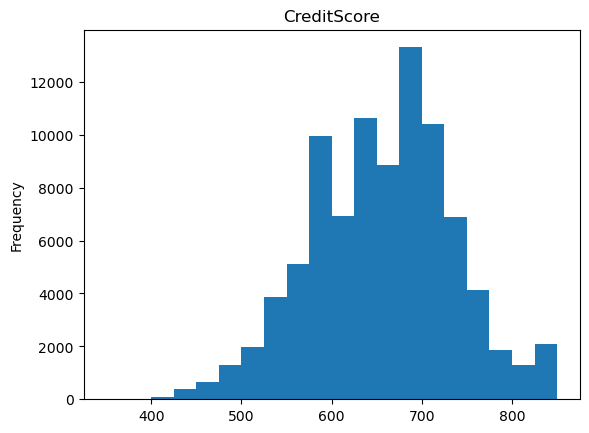

In [19]:
df2_balance['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')

<Axes: title={'center': 'Exited'}, ylabel='Frequency'>

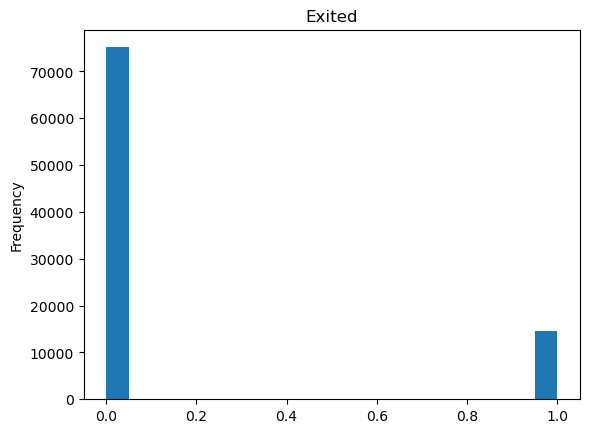

In [20]:
df2_balance['Exited'].plot(kind='hist', bins=20, title='Exited')

<Axes: >

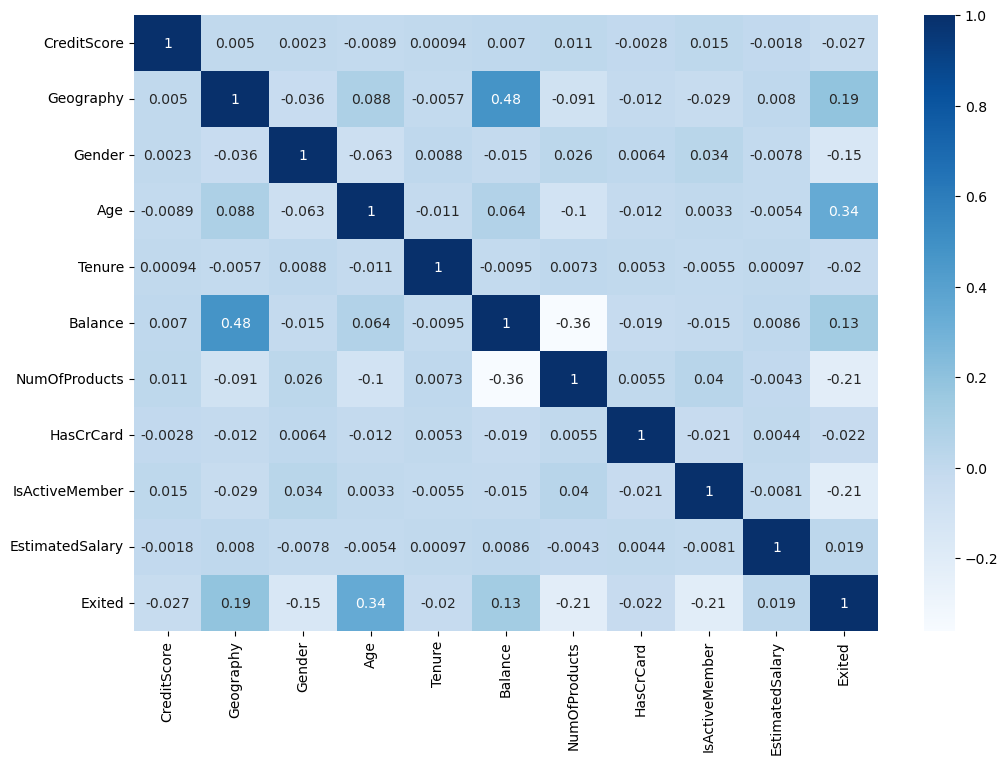

In [21]:
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)

# Data preprocessing

In [22]:
X = df.iloc[:, 0:10]
y = df.iloc[:, 10]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.0,3,0.00,2,1,0,181449.97
1,627,0,1,33.0,1,0.00,2,1,1,49503.50
2,678,0,1,40.0,10,0.00,2,1,0,184866.69
3,581,0,1,34.0,2,148882.54,1,1,1,84560.88
4,716,1,1,33.0,5,0.00,2,1,1,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,1,0,33.0,2,0.00,1,1,1,131834.75
165030,792,0,1,35.0,3,0.00,1,0,0,131834.45
165031,565,0,1,31.0,5,0.00,1,1,1,127429.56
165032,554,1,0,30.0,7,161533.00,1,0,1,71173.03


In [ ]:
## Encoding categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Convert categorical label to binary numerical label
LabelEncoder = LabelEncoder()
X = X.copy()

# Encododing the label.
X['Geography'] = LabelEncoder.fit_transform(X['Geography'])
X['Gender'] = LabelEncoder.fit_transform(X['Gender'])
X

In [23]:
y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 165034, dtype: int64

In [24]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(165034, 10)
(165034,)


In [25]:
# Convert Pandas to Numpy array
X = X.values
y = y.values

print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(165034, 10)
(165034,)


In [26]:
# Convert Numpy array to Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([165034, 10])
torch.Size([165034])


In [27]:
random_state = 123

# Split the training data set to training (70%) and testing set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=random_state
)

print(X_train.dtype)

#  Split the testing data set for validation (50%) and test (50%)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)


torch.float32


In [28]:
# Check the size and type of datasets after the splitting
print("Training set")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Validation set")
print(X_val.dtype, X_val.shape)
print(y_val.dtype, y_val.shape)

print("Testing set")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training set
torch.float32 torch.Size([115523, 10])
torch.float32 torch.Size([115523])
Validation set
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing set
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


In [29]:
# Import Smote
from imblearn.over_sampling import SMOTE

# create the instance of SMOTE
smote = SMOTE(random_state=random_state)

# Resampling the X and Y training dataset with SMOTE to handle imbalance dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [30]:
# Check the size and type of datasets after the splitting
print("Training set")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Training set (Smote)")
print(X_train_smote.dtype, X_train_smote.shape)
print(y_train_smote.dtype, y_train_smote.shape)

print("Validation set")
print(X_val.dtype, X_val.shape)
print(y_val.dtype, y_val.shape)

print("Testing set")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training set
torch.float32 torch.Size([115523, 10])
torch.float32 torch.Size([115523])
Training set (Smote)
float32 (182382, 10)
float32 (182382,)
Validation set
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing set
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


# Data Scaling

In [31]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
normal_scaler = MinMaxScaler()

# Normalize X variables
X_train_smote_normalized = normal_scaler.fit_transform(X_train_smote)
X_val_normalized = normal_scaler.transform(X_val)
X_test_normalized = normal_scaler.transform(X_test)

In [32]:
# Convert to Tensor and rename the X variables
X_train = X_train_smote_normalized = torch.tensor(X_train_smote_normalized, dtype=torch.float32)
X_val = X_val_normalized = torch.tensor(X_val_normalized, dtype=torch.float32)
X_test = X_test_normalized = torch.tensor(X_test_normalized, dtype=torch.float32)

# Move y_train_smote to y_train
y_train = torch.tensor(y_train_smote, dtype=torch.float32)

In [33]:
# Check the size and type of datasets after the splitting

print("Training set (SMOTE)")
print(X_train.dtype, X_train.shape)
print(y_train.dtype, y_train.shape)

print("Validation set")
print(X_val.dtype, X_val.shape)
print(y_val.dtype, y_val.shape)

print("Testing set")
print(X_test.dtype, X_test.shape)
print(y_test.dtype, y_test.shape)

Training set (SMOTE)
torch.float32 torch.Size([182382, 10])
torch.float32 torch.Size([182382])
Validation set
torch.float32 torch.Size([24756, 10])
torch.float32 torch.Size([24756])
Testing set
torch.float32 torch.Size([24755, 10])
torch.float32 torch.Size([24755])


In [34]:
# Increase the dimension of all label variables
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)
y_val = y_val.unsqueeze(1)

# Final check the datasets before feeding them to the model
print("Training set")
print(X_train.dtype, X_train.shape, type(X_train))
print(y_train.dtype, y_train.shape, type(y_train))

print("Validation set")
print(X_val.dtype, X_val.shape, type(X_val))
print(y_val.dtype, y_val.shape, type(y_val))

print("Testing set")
print(X_test.dtype, X_test.shape, type(X_train))
print(y_test.dtype, y_test.shape, type(y_train))

Training set
torch.float32 torch.Size([182382, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([182382, 1]) <class 'torch.Tensor'>
Validation set
torch.float32 torch.Size([24756, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([24756, 1]) <class 'torch.Tensor'>
Testing set
torch.float32 torch.Size([24755, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([24755, 1]) <class 'torch.Tensor'>


In [35]:
# To make sure we conduct a fair comparison between PyTorch and MatLab, We will use the same datasets to train, validate, and test the model on both 2 platforms
# I exported these tensors to CSV files and will upload them for training, validating, and testing in MATLAB.
# Please note that we don't need to run this block anymore. We need it only for the preprocessing of the data. 
# So, I freeze this block of code.

# Convert 6 datasets from Tensor back to Numpy
#X_train_ndarray = X_train.numpy()
#X_test_ndarray = X_test.numpy()
#X_val_ndarray = X_val.numpy()
#y_train_ndarray = y_train.numpy()
#y_test_ndarray = y_test.numpy()
#y_val_ndarray = y_val.numpy()

# Save all datasets to CSV file
#np.savetxt('X_train_ndarray.csv', X_train_ndarray, delimiter=',')
#np.savetxt('X_test_ndarray.csv', X_test_ndarray, delimiter=',')
#np.savetxt('X_val_ndarray.csv', X_val_ndarray, delimiter=',')
#np.savetxt('y_train_ndarray.csv', y_train_ndarray, delimiter=',')
#np.savetxt('y_test_ndarray.csv', y_test_ndarray, delimiter=',')
#np.savetxt('y_val_ndarray.csv', y_val_ndarray, delimiter=',')

# Neural Network model (Class)

In [36]:
# Define the structure of the Neural network model
input_features = 10
output_features = 1

# Define hyperparameters for using in grid search to find the best combination
learning_rates_grid = [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001]
hidden_neurons_grid = [2, 4, 7, 10, 20, 30, 50, 100, 200]

# The number of epochs
number_of_epochs = 1000

# Define the null variables to prepare for storing the result of the model
best_accuracy = 0.0
best_hyperparameters = {}

# Define the empty list to store the result of every combination of hyperparameters
learning_rates_list_heatmap = []
hidden_neurons_list_heatmap = []
accuracy_list_heatmap = []

In [37]:
# Build the class for Neural network model
class Credit_Churn_NN_Model(nn.Module):
    def __init__(self, input_features, hidden_neurons, output_features):
        super(Credit_Churn_NN_Model, self).__init__()
        self.fc1 = nn.Linear(input_features, hidden_neurons)
        self.fc2 = nn.Linear(hidden_neurons, output_features)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        output_layer1 = self.fc1(x)
        l1_activated = self.relu(output_layer1)
        output_layer2 = self.fc2(l1_activated)
        output_activated = self.sigmoid(output_layer2)
        return output_activated


In [38]:
# Build the function for the model
def train_NN_model(learning_rate, hidden_neurons, X_train, y_train, X_val, y_val, number_of_epochs):
    model = Credit_Churn_NN_Model(input_features, hidden_neurons, output_features)
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Define value holder for plotting in the graph
    plot_train_loss = []
    plot_val_loss = []

    # Iterate the model e time. e start from 0 to number_of_epochs - 1
    for e in range(number_of_epochs):
        # Training the model
        model.train()
        optimizer.zero_grad()
        y_train_pred = model(X_train)
        train_loss = criterion(y_train_pred, y_train)
        train_loss.backward()
        optimizer.step()
        # append the loss value (Train) to the value holder
        plot_train_loss.append(train_loss)

        # Validation the model
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
            # append the loss value (Validation) to the value holder
            plot_val_loss.append(val_loss)

    return model, plot_train_loss, plot_val_loss

# Fitting the model

In [39]:
# We will prepare the running time between Pytorch and MatLab
import time
# Start the timer
start_time = time.time()

# Grid search
for learning_rate in learning_rates_grid:
    for hidden_neurons in hidden_neurons_grid:
        print(f"Grid search > training the NNet model with learning rate={learning_rate} and hidden_neurons={hidden_neurons}")
        # Call the function to train and evaluate the model with the nested loop
        trained_model, train_loss, val_loss = train_NN_model(learning_rate, hidden_neurons, X_train, y_train, X_val, y_val, number_of_epochs)

        # After calling the train_NN_model() function, We'll get the trained model
        # We will evaluate the performance of this model by feeding X trained to the trained model

        # Preduct y from the X_train
        y_train_pred = (trained_model(X_train).detach().numpy() > 0.5).astype(int)
        # Calculate the accuracy rate of the model
        accuracy = (y_train_pred == y_train.numpy()).mean()
        #accuracy = (y_train_pred == y_train.numpy()).sum()/len(y_train)
        print(f"Accuracy rate is {accuracy}")
        
        # Store the results in lists
        learning_rates_list_heatmap.append(learning_rate)
        hidden_neurons_list_heatmap.append(hidden_neurons)
        accuracy_list_heatmap.append(accuracy)

        # Check if the current hyperparameters yield a better performance
        if accuracy > best_accuracy: # if Yes
            best_accuracy = accuracy # Then reassign this hyperparameter's accuracy to the best_accuracy variable
            # And replace the best_hyperparameters with the new Lr and Neurons
            best_hyperparameters = {'learning_rate': learning_rate, 'hidden_neurons': hidden_neurons}
            # And replace the plot variable
            train_loss_for_plotting = train_loss
            val_loss_for_plotting = val_loss
            # And replace the model with the best model
            best_model = trained_model

# After the final of nested loop, print the highest one
print("\nThe Best Hyperparameters are ", best_hyperparameters)

# Stop the timer
end_time = time.time()
# Calculate the total time of running code
Total_time = end_time - start_time

print(f"Total time taken: {Total_time} seconds")

Grid search > training the NNet model with learning rate=0.3 and hidden_neurons=2
Accuracy rate is 0.7691055038326151
Grid search > training the NNet model with learning rate=0.3 and hidden_neurons=4
Accuracy rate is 0.7628494039982016
Grid search > training the NNet model with learning rate=0.3 and hidden_neurons=7
Accuracy rate is 0.7734315886436162
Grid search > training the NNet model with learning rate=0.3 and hidden_neurons=10
Accuracy rate is 0.799963812218311
Grid search > training the NNet model with learning rate=0.3 and hidden_neurons=20
Accuracy rate is 0.7899079953065544
Grid search > training the NNet model with learning rate=0.3 and hidden_neurons=30
Accuracy rate is 0.8119057801756753
Grid search > training the NNet model with learning rate=0.3 and hidden_neurons=50
Accuracy rate is 0.8045146999155618
Grid search > training the NNet model with learning rate=0.3 and hidden_neurons=100
Accuracy rate is 0.8222741279292912
Grid search > training the NNet model with learning

In [40]:
train_loss

[tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.7083, grad_fn=<BinaryCrossEntropyBackw

In [ ]:
y_train_pred[:30]

In [41]:
best_hyperparameters

{'learning_rate': 0.3, 'hidden_neurons': 100}

In [42]:
input_features = 10
best_learning_rate = best_hyperparameters['learning_rate']
best_hidden_neurons = best_hyperparameters['hidden_neurons']

print(best_learning_rate)
print(best_hidden_neurons)

0.3
100


In [43]:
train_loss_for_plotting

[tensor(0.6982, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6891, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6844, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6808, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6774, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6742, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6711, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6681, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6652, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6623, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6595, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6568, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6542, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6516, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6491, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6467, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6443, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6419, grad_fn=<BinaryCrossEntropyBackw

In [44]:
# Convert from Tensor to list to prepare for plotting with Matplotlib
# Because we can't plot the tensor variables with Matplotlib
train_loss_for_plotting = [tensor_item.item() for tensor_item in train_loss_for_plotting]
val_loss_for_plotting = [tensor_item.item() for tensor_item in val_loss_for_plotting]
print(type(train_loss_for_plotting))
print(type(val_loss_for_plotting))

# Create a numpy list from 1 to the number of epochs
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)

<class 'list'>
<class 'list'>


numpy.ndarray

# Data evaluation

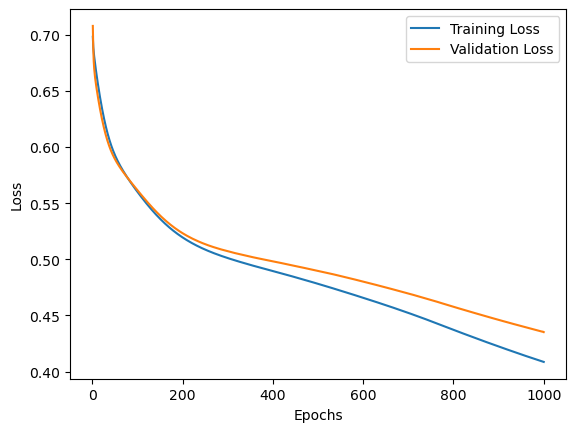

In [57]:
# Now, the type of train_loss_for_plotting and vali_loss_for_plotting are the list.
# We are ready to plot them in Matplotlib
plt.plot(Epochs, train_loss_for_plotting, label='Training Loss')
plt.plot(Epochs, val_loss_for_plotting, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
# Import the recording performance from MATLAB to plot in Python
import csv
with open('matlab_training_time_bestmodel.csv', 'r') as file1:
    reader1 = csv.reader(file1)
    matlab_training_time_bestmodel = np.array(list(reader1), dtype=float)

with open('matlab_train_loss_for_plotting.csv', 'r') as file2:
    reader2 = csv.reader(file2)
    matlab_train_loss_for_plotting = np.array(list(reader2), dtype=float)
    
with open('matlab_vali_loss_for_plotting.csv', 'r') as file3:
    reader3 = csv.reader(file3)
    matlab_vali_loss_for_plotting = np.array(list(reader3), dtype=float)


In [63]:
matlab_training_time_bestmodel = matlab_training_time_bestmodel.tolist()[0]
matlab_train_loss_for_plotting = matlab_train_loss_for_plotting.tolist()[0]
matlab_vali_loss_for_plotting = matlab_vali_loss_for_plotting.tolist()[0]

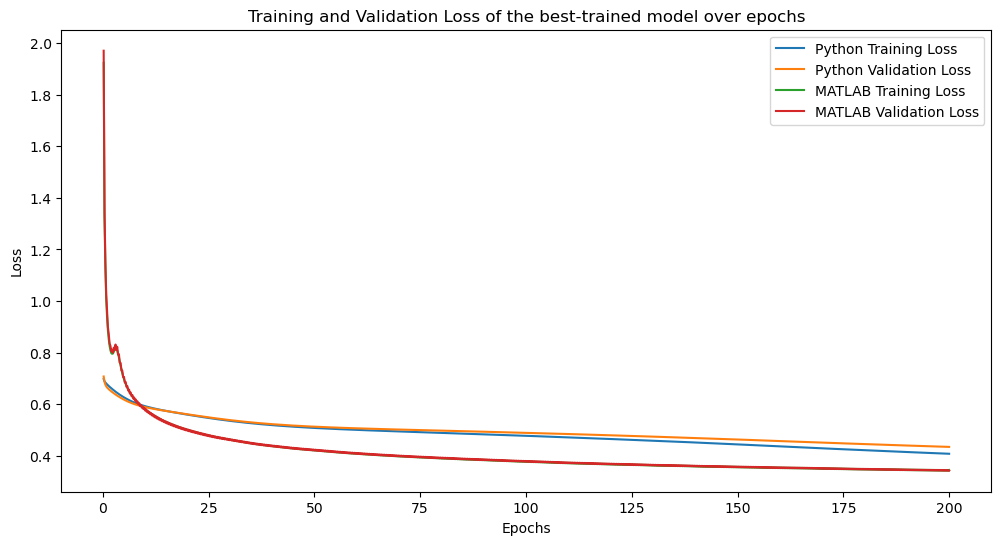

In [68]:
# Now, the type of train_loss_for_plotting and vali_loss_for_plotting are the list.
# We are ready to plot them in Matplotlib
fig = plt.figure(figsize=(12, 6))
plt.plot(Epochs/5, train_loss_for_plotting, label='Python Training Loss')
plt.plot(Epochs/5, val_loss_for_plotting, label='Python Validation Loss')
plt.plot(Epochs/5, matlab_train_loss_for_plotting, label='MATLAB Training Loss')
plt.plot(Epochs/5, matlab_vali_loss_for_plotting, label='MATLAB Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss of the best-trained model over epochs')
plt.show()

In [ ]:
# Combine the lists into a DataFrame
df_for_heatmap = pd.DataFrame({'Learning Rate': learning_rates_list_heatmap, 'Hidden Neurons': hidden_neurons_list_heatmap, 'Accuracy': accuracy_list_heatmap})

# Pivot the DataFrame to create a matrix suitable for a heatmap
pivoted_heatmap_data = df_for_heatmap.pivot('Hidden Neurons', 'Learning Rate', 'Accuracy')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivoted_heatmap_data, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('The performance of every combination of hyperparameters')
plt.xlabel('Learning Rate (LR)')
plt.ylabel('Hidden Neurons')
plt.show()


In [52]:
# Testing data set

best_model.eval()

# From sigmoid probabilities to y labels
y_test_pred = best_model(X_test) > 0.5

# Calculate the accuracy rate
#acc = (y_test_pred.round() == y_test).float().mean()
#acc = float(acc)
#print("Model accuracy: %.2f%%" % (acc*100))

In [53]:
y_test_pred

tensor([[False],
        [False],
        [ True],
        ...,
        [False],
        [ True],
        [ True]])

In [47]:
# Calculate = True positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
TP = ((y_test_pred.round() == 1) & (y_test == 1)).sum().item()
TN = ((y_test_pred.round() == 0) & (y_test == 0)).sum().item()
FP = ((y_test_pred.round() == 1) & (y_test == 0)).sum().item()
FN = ((y_test_pred.round() == 0) & (y_test == 1)).sum().item()

# Calculate the confusion matrix 
# Apart from Accuracy rate, we measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Precision",precision)
print("Recall",recall)
print("F1 score",f1)

Precision 0.5199600798403193
Recall 0.6998656687775858
F1 score 0.5966462167689162


In [48]:
y_test_pred[0:30]

tensor([[0.0549],
        [0.1249],
        [0.7663],
        [0.3971],
        [0.3500],
        [0.0808],
        [0.1631],
        [0.0510],
        [0.3599],
        [0.6623],
        [0.1559],
        [0.3942],
        [0.2292],
        [0.5754],
        [0.2569],
        [0.5518],
        [0.9690],
        [0.5367],
        [0.9367],
        [0.5953],
        [0.0986],
        [0.4607],
        [0.1104],
        [0.1898],
        [0.2716],
        [0.1139],
        [0.7975],
        [0.1541],
        [0.8319],
        [0.1105]], grad_fn=<SliceBackward0>)